##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
#1
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix, demo_data
from sklearn import linear_model, metrics, model_selection
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import math

In [2]:
#2
df = pd.read_csv("SCORES.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.shape

(25, 2)

Text(0, 0.5, 'Scores')

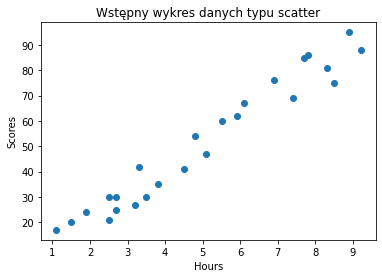

In [5]:
#3
plt.scatter(df["Hours"], df["Scores"])
plt.title("Wstępny wykres danych typu scatter")
plt.xlabel("Hours")
plt.ylabel("Scores") 

In [6]:
#4-6
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["Hours"], df["Scores"], test_size = 0.3)
reg = linear_model.LinearRegression().fit(X_train.to_numpy()[:, None], y_train)

print("coefficients: {} - współczynnik zmiennych niezależnych regresji".format(reg.coef_))
print("intercept: {} - wyraz wolny".format(reg.intercept_))

coefficients: [9.99743539] - współczynnik zmiennych niezależnych regresji
intercept: 2.542627029858565 - wyraz wolny


In [7]:
#7
pbnd = np.asarray(X_test)
pval = reg.predict(pbnd [:, None])

for x in range(len(X_test)):
    print("For x = {:>4}: predicted: {:>4.2f}, actual: {:>4}".format(pbnd[x], pval[x], y_test.to_numpy()[x]))

For x =  2.5: predicted: 27.54, actual:   30
For x =  3.2: predicted: 34.53, actual:   27
For x =  2.5: predicted: 27.54, actual:   21
For x =  3.5: predicted: 37.53, actual:   30
For x =  8.3: predicted: 85.52, actual:   81
For x =  3.3: predicted: 35.53, actual:   42
For x =  5.9: predicted: 61.53, actual:   62
For x =  8.5: predicted: 87.52, actual:   75


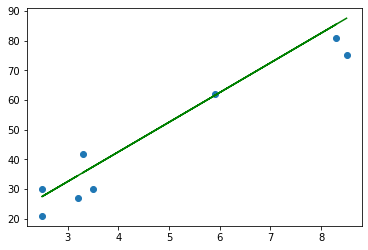

In [8]:
#8
plt.scatter(X_test, y_test)
plt.plot(pbnd, pval, color = 'g')

In [9]:
#9
MEA = mean_absolute_error(pval, y_test)
print("Średni błąd bezwględny : {}".format(MEA))

MSE = mean_squared_error(pval, y_test)
print("Błąd średniokwadratowy : {}".format(MSE))

RMSE = math.sqrt(MSE)
print("Pierwiastek błędu średniokwadratowego : {}".format(RMSE))

Średni błąd bezwględny : 6.006072523790818
Błąd średniokwadratowy : 47.69496040430623
Pierwiastek błędu średniokwadratowego : 6.906153806881673


**Nasze wyniki są dobre - mamy mały średni błąd bezwględny oraz mały pierwiastek błędu kwadratowego. Wynika to z dość niedużej skali pomiarów**

In [10]:
#Powtórzenie podpunktów 1-9 dla zbioru SBP.csv
#1
df = pd.read_csv("SBP.csv")
df

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132
5,68,130
6,66,127
7,77,163
8,63,136
9,54,115


In [11]:
#2
df.describe()

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


In [12]:
df.shape

(19, 2)

coefficients: [0.80513559] - współczynnik zmiennych niezależnych regresji
intercept: 74.73602111831056 - wyraz wolny
For x =   66: predicted: 127.87, actual:  127
For x =   74: predicted: 134.32, actual:  145
For x =   77: predicted: 136.73, actual:  163
For x =   63: predicted: 125.46, actual:  136
For x =   69: predicted: 130.29, actual:  141
For x =   61: predicted: 123.85, actual:  112


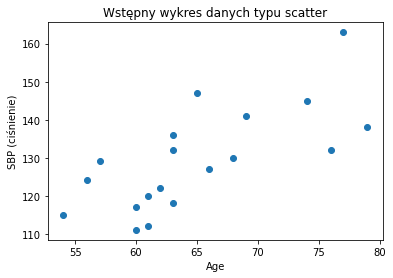

In [13]:
#3
plt.scatter(df["Age"], df["SBP"])
plt.title("Wstępny wykres danych typu scatter")
plt.xlabel("Age")
plt.ylabel("SBP (ciśnienie)")

#4-6
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["Age"], df["SBP"], test_size = 0.3)
reg = linear_model.LinearRegression().fit(X_train.to_numpy()[:, None], y_train)

print("coefficients: {} - współczynnik zmiennych niezależnych regresji".format(reg.coef_))
print("intercept: {} - wyraz wolny".format(reg.intercept_))

#7
pbnd = np.asarray(X_test)
pval = reg.predict(pbnd [:, None])

for x in range(len(X_test)):
    print("For x = {:>4}: predicted: {:>4.2f}, actual: {:>4}".format(pbnd[x], pval[x], y_test.to_numpy()[x]))

Średni błąd bezwględny : 11.821134309255255
Błąd średniokwadratowy : 195.19182238878986
Pierwiastek błędu średniokwadratowego : 13.97110669878338


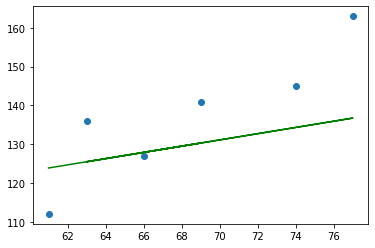

In [14]:
#8
plt.scatter(X_test, y_test)
plt.plot(pbnd, pval, color = 'g')

#9
MEA = mean_absolute_error(pval, y_test)
print("Średni błąd bezwględny : {}".format(MEA))

MSE = mean_squared_error(pval, y_test)
print("Błąd średniokwadratowy : {}".format(MSE))

RMSE = math.sqrt(MSE)
print("Pierwiastek błędu średniokwadratowego : {}".format(RMSE))

**Możemy powiedzieć że nasze wyniki są co najwyżej zadowolające. Widać to po średnim błędzie bezwględnym oraz po pierwiastku błędu średniokwadratowego. Wynikać to może z dość dużej skali ciśnienia - najniższe ciśnienie to około 110, a najwyższe to powyżej 160**

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [15]:
df = pd.read_csv("PETROL.csv")
df

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [16]:
df.shape

(48, 5)

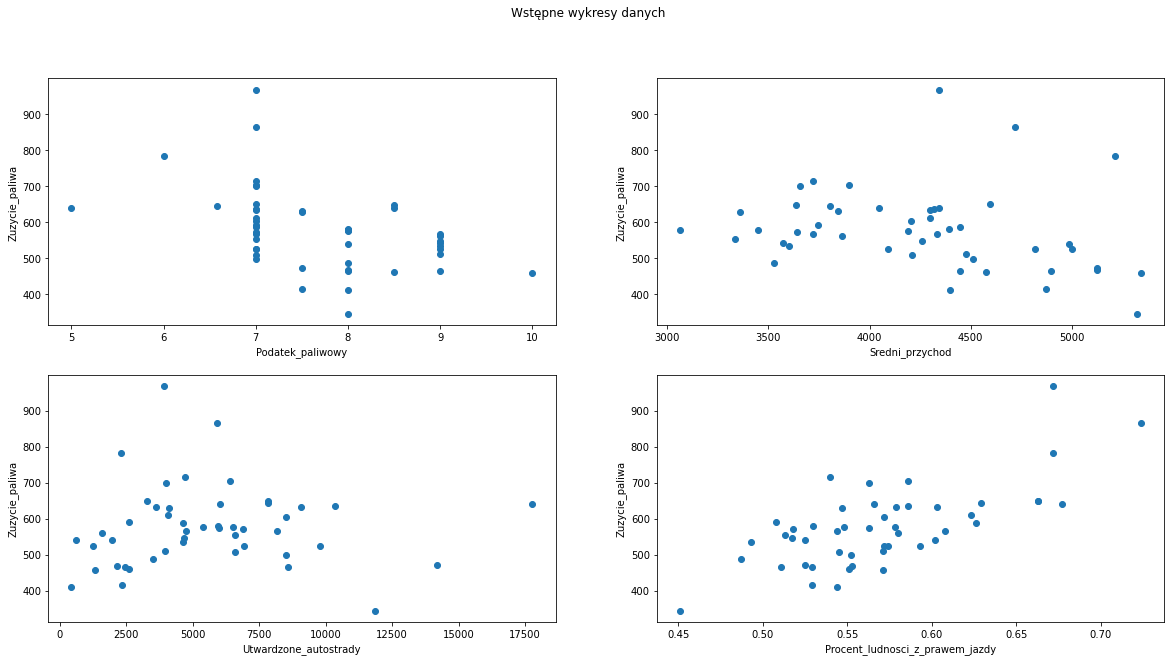

In [17]:
fig, axs = plt.subplots(2, 2 , figsize = (20, 10))
fig.suptitle("Wstępne wykresy danych")
axs[0, 0].scatter(df["Podatek_paliwowy"].to_numpy(), df["Zuzycie_paliwa"])
axs[0, 0].set_xlabel("Podatek_paliwowy")
axs[0, 0].set_ylabel("Zuzycie_paliwa")

axs[0, 1].scatter(df["Sredni_przychod"].to_numpy(), df["Zuzycie_paliwa"].to_numpy())
axs[0, 1].set_xlabel("Sredni_przychod")
axs[0, 1].set_ylabel("Zuzycie_paliwa")

axs[1, 0].scatter(df["Utwardzone_autostrady"].to_numpy(), df["Zuzycie_paliwa"].to_numpy())
axs[1, 0].set_xlabel("Utwardzone_autostrady")
axs[1, 0].set_ylabel("Zuzycie_paliwa")

axs[1, 1].scatter(df["Procent_ludnosci_z_prawem_jazdy"].to_numpy(), df["Zuzycie_paliwa"].to_numpy())
axs[1, 1].set_xlabel("Procent_ludnosci_z_prawem_jazdy")
axs[1, 1].set_ylabel("Zuzycie_paliwa")
plt.show()

In [18]:
y_label = "Zuzycie_paliwa"
x_labels = ["Podatek_paliwowy", "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]

x_w = np.asarray([df[label].to_numpy() for label in x_labels]).transpose()
y_w = df[y_label].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(x_w, y_w, test_size = 0.3)
reg = linear_model.LinearRegression().fit(X_train, y_train)

print("coefficients: {} - współczynniki zmiennych niezależnych regresji".format(reg.coef_))
print("intercept: {} - wyraz wolny".format(reg.intercept_))

coefficients: [-3.14496578e+01 -7.44095398e-02 -5.07079634e-03  1.61483293e+03] - współczynniki zmiennych niezależnych regresji
intercept: 250.61874192562777 - wyraz wolny


In [19]:
preds = reg.predict(X_test)

for x in range(len(X_test)):
    print("For x = {}: predicted: {:>4.2f}, actual: {:>4}".format(X_test[x], preds[x], y_test[x]))

For x = [5.0000e+00 4.0450e+03 1.7782e+04 5.6600e-01]: predicted: 616.21, actual:  640
For x = [8.000e+00 5.126e+03 2.138e+03 5.530e-01]: predicted: 499.76, actual:  467
For x = [8.000e+00 4.399e+03 4.310e+02 5.440e-01]: predicted: 547.98, actual:  410
For x = [7.000e+00 3.718e+03 4.725e+03 5.400e-01]: predicted: 601.87, actual:  714
For x = [9.000e+00 3.865e+03 1.586e+03 5.800e-01]: predicted: 608.54, actual:  561
For x = [7.000e+00 3.640e+03 6.905e+03 5.180e-01]: predicted: 561.09, actual:  571
For x = [8.000e+00 4.188e+03 5.975e+03 5.630e-01]: predicted: 566.25, actual:  574
For x = [7.000e+00 4.296e+03 4.083e+03 6.230e-01]: predicted: 696.14, actual:  610
For x = [8.500e+00 3.635e+03 3.274e+03 6.630e-01]: predicted: 766.85, actual:  648
For x = [7.000e+00 4.449e+03 4.639e+03 6.260e-01]: predicted: 686.79, actual:  587
For x = [9.000e+00 3.601e+03 4.650e+03 4.930e-01]: predicted: 472.16, actual:  534
For x = [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]: predicted: 271.35, actual:  

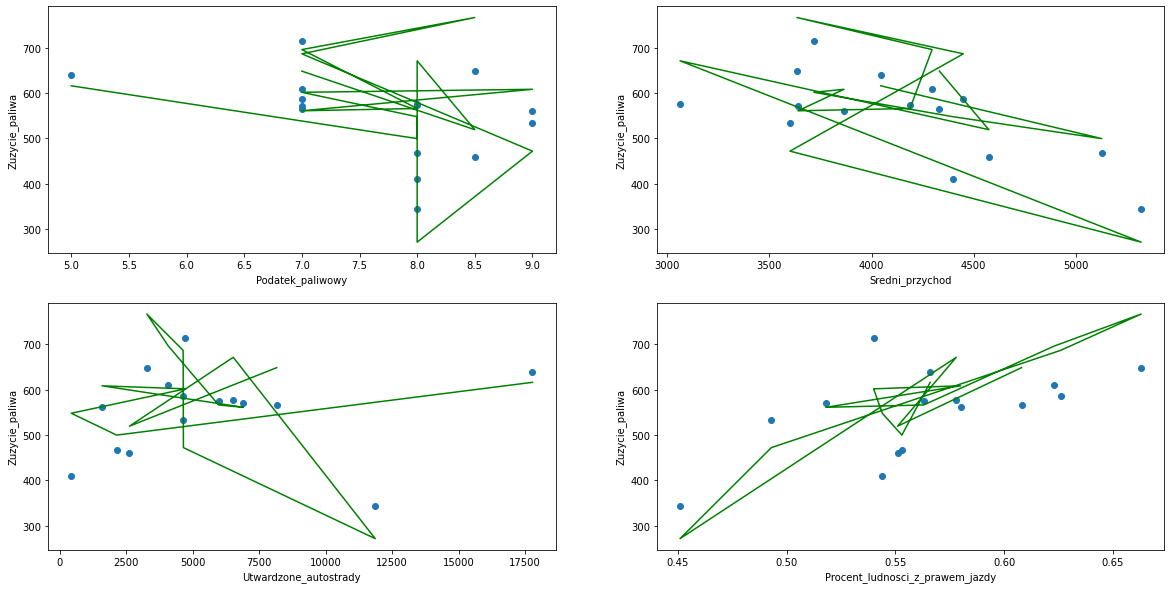

In [20]:
fig, axs = plt.subplots(2, 2 , figsize = (20, 10))
x = X_test[:, 0]
axs[0, 0].scatter(x, y_test)
axs[0, 0].plot(x, preds, color = 'g')
axs[0, 0].set_xlabel("Podatek_paliwowy")
axs[0, 0].set_ylabel("Zuzycie_paliwa")

x = X_test[:, 1]
axs[0, 1].scatter(x, y_test)
axs[0, 1].plot(x, preds, color = 'g')
axs[0, 1].set_xlabel("Sredni_przychod")
axs[0, 1].set_ylabel("Zuzycie_paliwa")

x = X_test[:, 2]
axs[1, 0].scatter(x, y_test)
axs[1, 0].plot(x, preds, color = 'g')
axs[1, 0].set_xlabel("Utwardzone_autostrady")
axs[1, 0].set_ylabel("Zuzycie_paliwa")

x = X_test[:, 3]
axs[1, 1].scatter(x, y_test)
axs[1, 1].plot(x, preds, color = 'g')
axs[1, 1].set_xlabel("Procent_ludnosci_z_prawem_jazdy")
axs[1, 1].set_ylabel("Zuzycie_paliwa")
plt.show()

In [21]:
MEA = mean_absolute_error(preds, y_test)
print("Średni błąd bezwględny : {}".format(MEA))

MSE = mean_squared_error(preds, y_test)
print("Błąd średniokwadratowy : {}".format(MSE))

RMSE = math.sqrt(MSE)
print("Pierwiastek błędu średniokwadratowego : {}".format(RMSE))

Średni błąd bezwględny : 69.83671207127341
Błąd średniokwadratowy : 6369.204786660367
Pierwiastek błędu średniokwadratowego : 79.80729782833376


**Nasze wyniki nie są zbyt dobry co widać po wysokości błędu bezwlędnego oraz pierwiastku błędu średniokwadratowego. Wynikać to może z dużej skali ilości zużycia paliwa - najmniejsze zużycie paliwa to około 300, a największe powyżej 700**

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [22]:
#2
df1 = pd.read_csv("HEART.csv")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [23]:
#3
df_new = df1
df_new[df_new == "?"] = float("NaN")
for invalid_col in ["slope", "ca", "thal"]:
    del df_new[invalid_col]
df_new = df_new.dropna(axis=0, how="any")
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [24]:
#4
d_labels = ["restecg", "cp"]
df_new_new = pd.get_dummies(df_new, columns=d_labels)
df_new_new

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4
0,28,1,130,132,0,185,0,0.0,0,0,0,1,0,1,0,0
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,0,1,0,1,0,0,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,1,0,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,1,0,0,0,0,0,1
290,54,0,130,294,0,100,1,0.0,1,0,1,0,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,1,0,0,0,0,0,1
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,1,0,0


In [25]:
#5
y_label = "num       "
x_labels = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'restecg_0', 'restecg_1', 'restecg_2', 'cp_1', 'cp_2', 'cp_3', 'cp_4']

x_w = df_new_new[x_labels].to_numpy()
y_w = df_new_new[y_label].to_numpy()

In [26]:
#6
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_w, y_w, test_size = 0.2)
reg = linear_model.LogisticRegression(max_iter = 2e16).fit(X_train, y_train)

print("coefficients: {} - współczynniki zmiennych niezależnych regresji".format(reg.coef_))
print("intercept: {} - wyraz wolny".format(reg.intercept_))

coefficients: [[-0.01425923  1.05982907 -0.0020815   0.00386567  0.75051741 -0.01651266
   0.65497765  1.12613962  0.03084182  0.01109947 -0.09908969  0.53834512
  -1.17011639 -0.11145957  0.68608245]] - współczynniki zmiennych niezależnych regresji
intercept: [-0.06789864] - wyraz wolny


In [27]:
#7
preds = reg.predict(X_test)
residua = preds - y_test

pred_label = "Pred_num"

df_new_new_new = pd.DataFrame({label: X_test[:, ix] for ix, label in enumerate(x_labels)})
df_new_new_new[y_label] = y_test
df_new_new_new[pred_label] = preds

df_new_new_new

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4,num,Pred_num
0,58,0,180,393,0,110,1,1.0,1,0,0,0,1,0,0,1,0
1,46,1,180,280,0,120,0,0.0,0,1,0,0,0,0,1,0,0
2,41,1,120,295,0,170,0,0.0,1,0,0,0,1,0,0,0,0
3,55,1,120,256,1,137,0,0.0,1,0,0,0,1,0,0,0,0
4,47,0,140,257,0,135,0,1.0,1,0,0,0,1,0,0,0,0
5,57,1,140,260,1,140,0,0.0,1,0,0,0,1,0,0,0,0
6,37,1,130,283,0,98,0,0.0,0,1,0,0,1,0,0,0,0
7,54,1,120,237,0,150,1,1.5,1,0,0,0,0,1,0,1,1
8,55,1,140,268,0,128,1,1.5,1,0,0,0,0,0,1,1,1
9,42,1,120,198,0,155,0,0.0,1,0,0,0,1,0,0,0,0


In [31]:
MEA = mean_absolute_error(preds, y_test)
print("Średni błąd bezwględny : {}".format(MEA))

MSE = mean_squared_error(preds, y_test)
print("Błąd średniokwadratowy : {}".format(MSE))

RMSE = math.sqrt(MSE)
print("Pierwiastek błędu średniokwadratowego : {}".format(RMSE))

print(classification_report(y_test, preds))

Średni błąd bezwględny : 0.1509433962264151
Błąd średniokwadratowy : 0.1509433962264151
Pierwiastek błędu średniokwadratowego : 0.38851434494290565
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.82      0.74      0.78        19

    accuracy                           0.85        53
   macro avg       0.84      0.82      0.83        53
weighted avg       0.85      0.85      0.85        53

